<h1>Data Scaling, Regularisation and Feature Selection</h3>

<ul>
    <li>
        Data Scaling
    </li>
    <li>
        Regularisation
    </li>
    <li>
        Feature Selection
    </li>
</ul>

<h2>1. Data Scaling</h2><br/>
Data Scaling is the process of rescaling the dynamic range of features to the same level making them equally comparable. It has the benefits of <b>improving the performance in several machine learning models</b>. There are two common types of data scaling:

<ul>
    <li>Normalisation</li>
    <li>Standardisation</li>
 </ul>

<h3>1.1. Normalisation</h3>

Normalisation is the process of rescaling the dynamic range of a feature between [0,1] or [-1,1].

$$
\hat{x} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

In this process, the minimum value is squeezed to 0 and the maximum value is squeezed to 1. All the remaining elements are rescaled in between.
In Python, Normalisation is performed using the <b>MinMaxScaler class in sklearn</b>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

N = 100
t_n = np.linspace(0,4*np.pi,N)
y_n = 2*np.sin(t_n)

df = pd.DataFrame({'t_n':t_n.tolist(),'y_n':y_n.tolist()})

[Text(0.5, 1.0, 'histogram')]

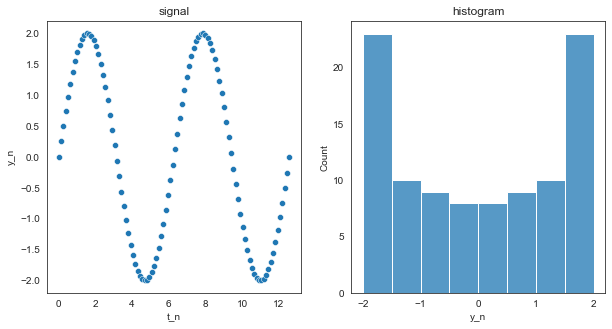

In [11]:
fig, axes = plt.subplots(1,2,figsize=[10,5])

sns.set_style("white")
sns.scatterplot(data=df, x='t_n', y='y_n',ax=axes[0]).set(title='signal')
sns.histplot(df['y_n'],ax=axes[1]).set(title='histogram')

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['y_n_norm'] = scaler.fit_transform(df[['y_n']]) #rescale feature

[Text(0.5, 1.0, 'histogram')]

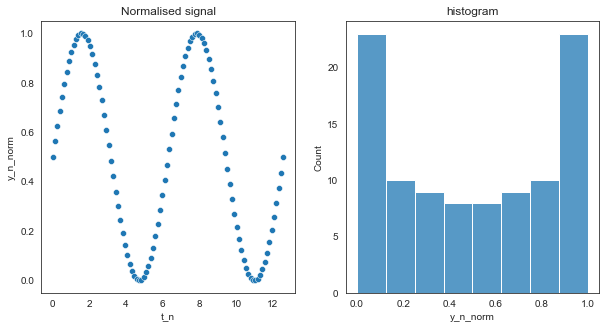

In [13]:
fig, axes = plt.subplots(1,2,figsize=[10,5])

sns.set_style("white")
sns.scatterplot(data=df, x='t_n', y='y_n_norm',ax=axes[0]).set(title='Normalised signal')
sns.histplot(df['y_n_norm'],ax=axes[1]).set(title='histogram')

<b>Limitations of Normalisation</b><br/>

Normalisation is <b>sensitive to outliers</b>, that squeezes the useful data spread to a much lower dynamic range within 0 and 1.

<h3>1.2. Standardisation</h3>

Standardisation is the process of rescaling the feature dynamic range using statiscal information. It is also called <b>z-score standardisation</b> as it makes uses of the <b>mean and standard deviation</b> to rescale the variable. 

$$
 \hat{x} = \frac{x-\mu}{\sigma}
$$

In Python, Normalisation is performed using the <b>StandardScaler class in sklearn</b>

It is much <b>more robust to outliers</b> (however not perfect). Values around the negative and positive side.

In [ ]:
#<---#-1   1#--->

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['y_n_std'] = scaler.fit_transform(df[['y_n']]) #rescale feature

[Text(0.5, 1.0, 'histogram')]

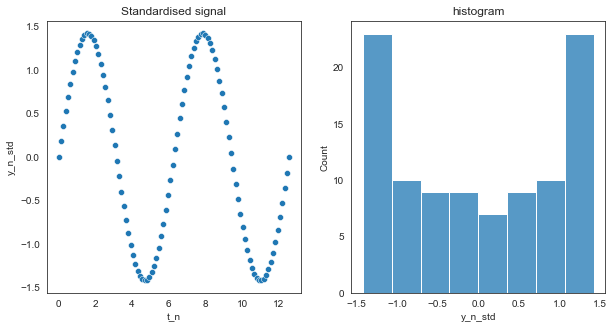

In [15]:
fig, axes = plt.subplots(1,2,figsize=[10,5])

sns.set_style("white")
sns.scatterplot(data=df, x='t_n', y='y_n_std',ax=axes[0]).set(title='Standardised signal')
sns.histplot(df['y_n_std'],ax=axes[1]).set(title='histogram')

<h2>2. Regularisation</h2><br/>
Regularisation is a process in machine learning that aims to prevent a model from <b>overfitting</b> for the sake of achieving a much <b>higher predictive accuracy or generalisation</b>.

<img src="https://raw.githubusercontent.com/YvesMatanga/freemium_datascience/main/machine-learning-tutorials/media/underfitting_goodfitting_overfitting.png" width="800px"/>

This achieved in Linear regression by means of the <b>Shrinkage method</b>

In [ ]:
x1 = x2

4x1 + 0x2
3x1 + x1
1.5x1 + 1.5x2

0.3x1 + 0x2

0.26x1 + 0.04x2
0.2x1 + 0.1x2

<h3>2.1. The Shrinkage method</h3><br/>
The Shrinkage method is a technique in linear regression that discourages <b>extreme or large coefficients</b> while <b>keeping a good model fit</b>. The negative effects of large coefficients: 

<ul>
    <li>Very <b>sensitive to outliers</b> (i.e. large values)</li>
    <li>Large coefficients can result in a model that <b>fits the training data too closely</b>, capturing noise and fluctuations that don't represent the true underlying patterns in the data</li>
    <li><b>Numerical instability</b>: In the presence of multicollinearity (high correlation between input features), large coefficients can lead to numerical instability. Small changes in the input data can result in large changes in the coefficients, making the model less reliable (i.e. interpretability)</li>
</ul>

The Shrinkage method therefore modifies the model fitting criterion adding a <b>penalty term for large coefficients</b>.

$$
\text{min } \sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}\beta_jx_{ji})^2 + LCPT
$$

$$
\text{min } RSS + LCPT
$$

<b>RSS</b> = Sum of square of residual errors, <b>LCPT</b> = Larger Coefficients Penalty Term

<p style="color:blue"><b>The shrinkage method provides a tradeoff fitting the data well while penalising large and irrelevant coefficients</b>. It combats good fitness with an overly complex model (i.e large values).</p>

Based on the nature of the large coefficients penalty term, two <b>Regularised Linear Regression</b> exist.

<h3>2.2. Ridge Regression</h3><br/>
Ridge regression is a regularised linear regression using a model fitness criterion of the form:


$$
\text{min } \sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}\beta_jx_{ji})^2 + \alpha\sum_{j=1}^{p}\beta_j^2
$$

$$
\text{min } RSS + \alpha\sum_{j=1}^{p}\beta_j^2
$$


that penalises large coefficients using a <b>scaled sum of squared coefficients</b>. Thus the $\beta_j$ are prompted to be smaller especially for less contributing features.

<b>The effectiveness of this technique requires that the features are normalised and of equal/similar dynamic range</b>.

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/regression_sprint_data_2.csv', index_col=0)
df.head()

,ZAR/USD,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),Total Reserves excl Gold (USD),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
2008M01,7.01,5611.90,39356.82,8105.11,56841.94,29884.51,1.92,29526.78,51547.61,37752.29,11.0,10.64,10.47,4.53,10.83,14.5,8.36,312.97,86.03,85.48
2008M02,7.66,6126.16,46946.33,8159.43,62527.78,30304.31,2.01,29943.04,59702.31,45927.67,11.0,10.66,10.32,5.61,11.00,14.5,8.69,335.09,87.23,85.91
2008M03,7.97,6417.48,51150.89,8010.87,63851.12,30615.42,2.05,30246.54,56448.18,42565.17,11.0,10.69,10.18,5.62,11.04,14.5,9.16,348.84,89.00,87.04
2008M04,7.79,7215.71,56174.34,9112.97,70944.49,30763.42,2.03,30399.21,55534.75,43342.70,11.5,11.00,10.27,5.80,11.28,15.0,9.15,358.47,90.83,87.61
2008M05,7.62,7379.67,56240.45,9090.14,69275.97,30831.43,2.10,30467.81,57682.89,46533.13,11.5,11.20,10.60,6.50,11.39,15.0,9.51,371.98,95.32,88.32


In [29]:
# Separate the features from the response
X = df.drop('ZAR/USD', axis=1)
y = df['ZAR/USD']

# Import the scaling module
from sklearn.preprocessing import StandardScaler
# Create standardization object
scaler = StandardScaler()
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)
# Import train/test split module
from sklearn.model_selection import train_test_split
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

# Fit a basic linear model
from sklearn.linear_model import LinearRegression, Ridge
# Least squares using all predictors
lm_all = LinearRegression()
# Ridge using all predictors
ridge = Ridge()

lm_all.fit(X_train, y_train)
ridge.fit(X_train, y_train)

from sklearn import metrics
train_lm_all = lm_all.predict(X_train)
train_ridge = ridge.predict(X_train)

test_lm_all = lm_all.predict(X_test)
test_ridge = ridge.predict(X_test)

# Dictionary of results
results_dict = {'Training MSE':
                    {
                        "Linear Regression": metrics.mean_squared_error(y_train, train_lm_all),
                        "Ridge": metrics.mean_squared_error(y_train, train_ridge)
                    },
                    'Test MSE':
                    {
                        "Linear Regression": metrics.mean_squared_error(y_test, test_lm_all),
                        "Ridge": metrics.mean_squared_error(y_test, test_ridge)
                    },
                'Training R2':
                    {
                        "Linear Regression": metrics.r2_score(y_train, train_lm_all),
                        "Ridge": metrics.r2_score(y_train, train_ridge)
                    },
                    'Test R2':
                    {
                        "Linear Regression": metrics.r2_score(y_test, test_lm_all),
                        "Ridge": metrics.r2_score(y_test, test_ridge)
                    }
                }

# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
results_df

,Training MSE,Test MSE,Training R2,Test R2
Linear Regression,0.032654,1.683601,0.991058,-0.934859
Ridge,0.039696,0.669186,0.989129,0.230946


<h3>2.2. LASSO Regression</h3><br/>
LASSO regression is a regularised linear regression using a model fitness criterion of the form:


$$
\text{min } \sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}\beta_jx_{ji})^2 + \alpha\sum_{j=1}^{p}|\beta_j|
$$

$$
\text{min } RSS + \alpha\sum_{j=1}^{p}|\beta_j|
$$


that penalises large coefficients using a <b>scaled sum of absolute coefficients</b>. One improvement of LASSO regression over Ridge regression is that the $\beta_j$ coefficients can become zeros which literally ommits features. Thus, <b>LASSO embeds at the same time a feature selection technique</b>.

In [18]:
# Import LASSO module
from sklearn.linear_model import Lasso
# Fit a basic linear model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Least squares using all predictors
lm_all = LinearRegression()
# Ridge using all predictors
ridge = Ridge()

lm_all.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)
# Train the LASSO model
lasso.fit(X_train, y_train)
train_lasso = lasso.predict(X_train)
test_lasso = lasso.predict(X_test)

from sklearn import metrics
train_lm_all = lm_all.predict(X_train)
train_ridge = ridge.predict(X_train)

test_lm_all = lm_all.predict(X_test)
test_ridge = ridge.predict(X_test)

# Dictionary of results
results_dict = {'Training MSE':
                    {
                        "Linear Regression": metrics.mean_squared_error(y_train, train_lm_all),
                        "Ridge": metrics.mean_squared_error(y_train, train_ridge),
                        "LASS0": metrics.mean_squared_error(y_train, train_lasso),
                        
                    },
                    'Test MSE':
                    {
                        "Linear Regression": metrics.mean_squared_error(y_test, test_lm_all),
                        "Ridge": metrics.mean_squared_error(y_test, test_ridge),
                        "LASS0": metrics.mean_squared_error(y_test, test_lasso),
                        
                    },
                'Training R2':
                    {
                        "Linear Regression": metrics.r2_score(y_train, train_lm_all),
                        "Ridge": metrics.r2_score(y_train, train_ridge),
                        "LASS0": metrics.r2_score(y_train, train_lasso)
                    },
                    'Test R2':
                    {
                        "Linear Regression": metrics.r2_score(y_test, test_lm_all),
                        "Ridge": metrics.r2_score(y_test, test_ridge),
                        "LASS0": metrics.r2_score(y_test, test_lasso)
                    }
                }

# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
results_df

,Training MSE,Test MSE,Training R2,Test R2
Linear Regression,0.032654,1.683601,0.991058,-0.934859
Ridge,0.039696,0.669186,0.989129,0.230946
LASS0,0.046672,0.586468,0.987219,0.326008


The Experiment shows how Regularised regression improve the predictive accuracy of the linear regression model (i.e. performance on test) with LASS0 regression being an improved over Ridge and Linear Regression.

<h2>3. Feature Selection</h2><br/>

<img src="https://raw.githubusercontent.com/YvesMatanga/freemium_datascience/main/machine-learning-tutorials/media/ml_process.png" width="900px"/>

Feature selection is the process of <b>selecting a set of relevant features</b> for the machine learning task while <b>discarding irrelevant and noisy features</b> that <b>may hinder</b> the model <b>performance</b>.

In [ ]:
[y] = f(X), X= [x_1,x_2,....,x_n]


Filter method <- statisticl_measure(y,x_i)


r = corr(y,x_i), y,x_i real_numbers -1,+1
r^2 <---


<h3>3.1 Feature selection methods</h3>

There are four types of feature selection methods (however, conventionally two or three).

<ul>
    <li><b>Filter methods</b></li>
    <li><b>Wrapper methods</b>
    </li>
    <li>
        <b>Embedded methods (i.e LASSO, stepwise regression)</b>
    </li>
    <li>
        <b>Variance thresholding methods</b>
    </li>
</ul>

<h3>3.2 Filter methods</h3>

Filter selection methods are methods that assess the relevance of a feature to the target variable without the intervention of the model. There are based on pair-wise statiscal analysis or feature importance score between the target variable and the feature.

<h4>1. Pearson correlation</h4>

Pearson correlation $r$ is a coefficient that measures the linear relationship between two continuous variables.

$$ corr(x,y) =  \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$

$$ -1\leq corr(x,y) \leq 1$$

In [22]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

real_estate_df = pd.read_csv('real_estate_data.csv')
real_estate_df.head()

X_re = real_estate_df.iloc[:,0:-1] #fetch the features
y_re = real_estate_df.iloc[:,[-1]] #fetch the target variable

In [23]:
from sklearn.feature_selection import r_regression

N_f = len(X_re.columns)

r_coefs = r_regression(X_re,y_re)#compute the pearson correlation for each feature
r_dict = {}
for i in range(N_f):
    r_dict[X_re.columns[i]] = [r_coefs[i]]

r_coefs_df = pd.DataFrame(r_dict)
r_coefs_df.head()

,Unnamed: 0,house_age,dist_nStation,num_cStores,dist_nStation.1,lat,long
0,-0.028587,-0.210567,-0.673613,0.571005,-0.673613,0.546307,0.523287


<h4>2. Mutual information</h4>

Mutual information is a ranking score that assess the existence of a nonlinear relationship between two variables. It is based on information theory. It can be used for both real valued and categorical variables.


$$I(X;Y) = \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x, y) \log\left(\frac{p(x, y)}{p(x)p(y)}\right)
$$


$$I(X;Y) \geq 0$$

In [24]:
from sklearn.feature_selection import mutual_info_regression

N_f = len(X_re.columns)

m_coefs = mutual_info_regression(X_re,y_re)#compute the mutual information for each feature against the target
m_dict = {}
for i in range(N_f):
    m_dict[X_re.columns[i]] = [m_coefs[i]]

m_coefs_df = pd.DataFrame(m_dict)
m_coefs_df.head()

,Unnamed: 0,house_age,dist_nStation,num_cStores,dist_nStation.1,lat,long
0,0.003822,0.320795,0.638511,0.389529,0.637942,0.544693,0.657965


<h4>Discoverying nonlinearity relationship with Mutual information</h4>

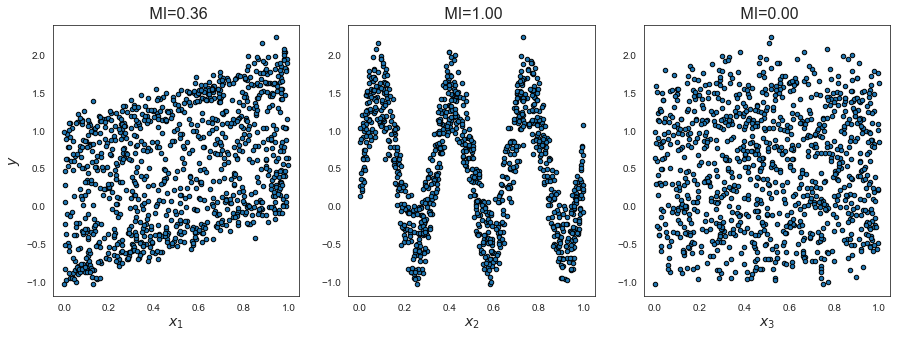

In [25]:
import numpy as np

np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title(" MI={:.2f}".format(mi[i]), fontsize=16)
plt.show()

<b>3. Chi Square - $\chi^2$</b>

The Chi square is a statistical test that verifies the dependency between two categorical variables.

$$ 
\chi^2 = \sum_{}^{}\frac{(O_i-E_i)^2}{E_i}
$$

<h3>3.2 Wrapper-based methods</h3>